<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E5%85%AD%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/2011B")
!ls

 data1.csv   data2.csv	'SimHei .ttf'


In [4]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-09-02 12:57:00--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  31.4MB/s    in 0.3s    

2022-09-02 12:57:01 (31.4 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/2011B/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 37.2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

In [28]:
data1 = pd.read_csv('data1.csv',header = None)
data1

,0,1
0,413.0,359.0
1,403.0,343.0
2,383.5,351.0
3,381.0,377.5
4,339.0,376.0
...,...,...
87,444.5,383.0
88,441.0,385.0
89,440.5,381.5
90,445.0,380.0


In [9]:
data2 = pd.read_csv('data2.csv',header = None)
data2

,0,1
0,1,75
1,1,78
2,2,44
3,3,45
4,3,65
...,...,...
135,89,20
136,89,84
137,89,90
138,90,91


In [10]:
points_map = data1.values

In [15]:
distance_matrix = (np.ones((92,92)) - np.eye(92))* 10000

In [16]:
distance_matrix

array([[    0., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000.,     0., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000.,     0., ..., 10000., 10000., 10000.],
       ...,
       [10000., 10000., 10000., ...,     0., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000.,     0., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000.,     0.]])

In [41]:
from scipy.spatial import distance
tem1 = 0
tem2 = 0

for i in range(140):
  tem1 = data2.values[i][0]-1
  tem2 = data2.values[i][1]-1
  distance_matrix[tem1][tem2] = distance.euclidean(data1.values[tem1], data1.values[tem2])
  distance_matrix[tem2][tem1] = distance.euclidean(data1.values[tem1], data1.values[tem2])

distance_matrix[1][43]

9.486832980505138

In [56]:
graph = distance_matrix.copy()
n=92
for k in range(n):
	for i in range(n):
		for j in range(n):
			graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])
graph = graph / 10
graph # 得到时间矩阵

array([[0.        , 1.89874901, 3.88388424, ..., 4.11785817, 4.59219982,
        6.59469826],
       [1.89874901, 0.        , 2.11165363, ..., 5.85328599, 6.32762763,
        8.07279591],
       [3.88388424, 2.11165363, 0.        , ..., 7.11990669, 7.48405011,
        8.24900381],
       ...,
       [4.11785817, 5.85328599, 7.11990669, ..., 0.        , 0.47434165,
        2.47684009],
       [4.59219982, 6.32762763, 7.48405011, ..., 0.47434165, 0.        ,
        2.00249844],
       [6.59469826, 8.07279591, 8.24900381, ..., 2.47684009, 2.00249844,
        0.        ]])

In [69]:
# 取出前20行，然后删去1-20列和特殊值，得到一个二维list
# 这是个连通图，所以没有1w这个异常值
obj_matrix = graph[0:20]
obj_matrix = obj_matrix[:,20:]
obj_matrix.shape

(20, 72)

接下来看一下这些数据的分布：

先来看看满足要求的点的个数，差距还是很大的，

In [73]:
(obj_matrix <= 3).sum(axis = 1)

array([20, 17, 11,  9, 10, 10,  7, 11,  9,  0,  4,  1,  4,  0,  1,  8,  6,
       19, 23, 12])

这个需要结合地图来获取一个直观的感受：

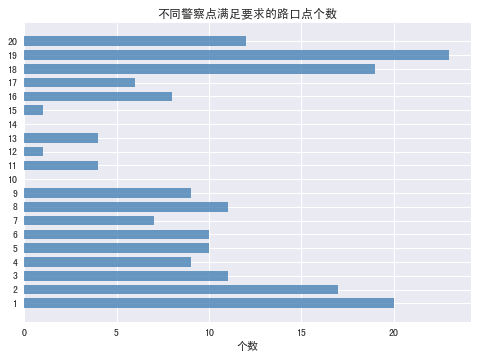

In [83]:
price = [20, 17, 11,  9, 10, 10,  7, 11,  9,  0,  4,  1,  4,  0,  1,  8,  6,
       19, 23, 12]

plt.barh(range(20), price, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(20), ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"])

plt.xlabel("个数")
plt.title("不同警察点满足要求的路口点个数")

plt.show()

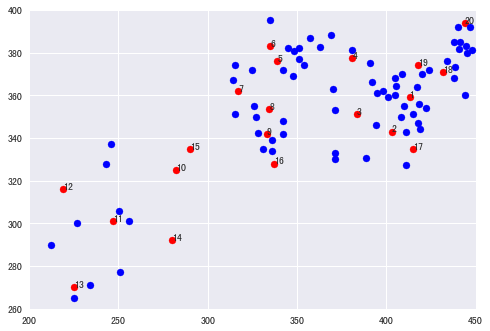

In [75]:
plt.scatter(data1.values[0:20][:,0],data1.values[0:20][:,1],c = 'r',marker = 'o')  
plt.scatter(data1.values[20:][:,0],data1.values[20:][:,1],c = 'b',marker = 'o')  

annotations=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]

for i, label in enumerate(annotations):
    plt.annotate(label, (data1.values[0:20][:,0][i], data1.values[0:20][:,1][i]))


plt.xlim((200, 450))
plt.ylim((260, 400))

plt.show()